In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('/content/cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3569 entries, 0 to 3568
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3569 non-null   int64  
 1   diagnosis               3569 non-null   object 
 2   radius_mean             3569 non-null   float64
 3   texture_mean            3569 non-null   float64
 4   perimeter_mean          3569 non-null   float64
 5   area_mean               3569 non-null   float64
 6   smoothness_mean         3569 non-null   float64
 7   compactness_mean        3569 non-null   float64
 8   concavity_mean          3569 non-null   float64
 9   concave points_mean     3569 non-null   float64
 10  symmetry_mean           3569 non-null   float64
 11  fractal_dimension_mean  3569 non-null   float64
 12  radius_se               3569 non-null   float64
 13  texture_se              3569 non-null   float64
 14  perimeter_se            3569 non-null   

In [5]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,2222
M,1347


In [6]:
data.shape

(3569, 25)

In [7]:
from sklearn.model_selection import train_test_split

In [38]:
# Drop the 'id' column as it is not a feature for prediction before splitting
X = data.drop(['diagnosis', 'id'], axis = 1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (2855, 24) (2855,)
Test Set:  (714, 24) (714,)


In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [12]:
from sklearn.linear_model import LogisticRegression
model_5 = LogisticRegression()
model_5.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
import seaborn as sns

<Axes: xlabel='diagnosis', ylabel='count'>

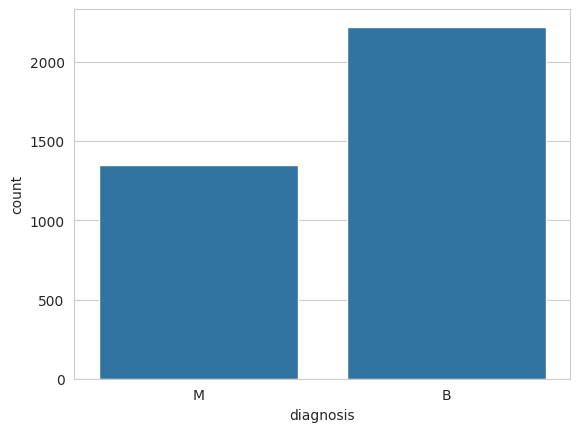

In [14]:
sns.set_style('whitegrid')
sns.countplot(x = 'diagnosis', data = data)

In [15]:
dataset = data
dataset['diagnosis'].replace(['M','B'], [1,0], inplace = True)

/tmp/ipython-input-559496386.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['diagnosis'].replace(['M','B'], [1,0], inplace = True)


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle
import os

# Load the breast cancer dataset
try:
    df = pd.read_csv('/content/cancer.csv')
except FileNotFoundError:
    print("Error: cancer.csv not found. Please make sure the file is in the correct directory.")
    exit()

# Drop the 'id' column as it is not a feature for prediction
df = df.drop(columns='id', axis=1)

# Encode the 'diagnosis' column (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target (y)
X = df.drop(columns='diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

print(f"Training accuracy: {model.score(X_train, y_train):.4f}")
print(f"Testing accuracy: {model.score(X_test, y_test):.4f}")

Training accuracy: 0.9863
Testing accuracy: 0.9888


<Axes: >

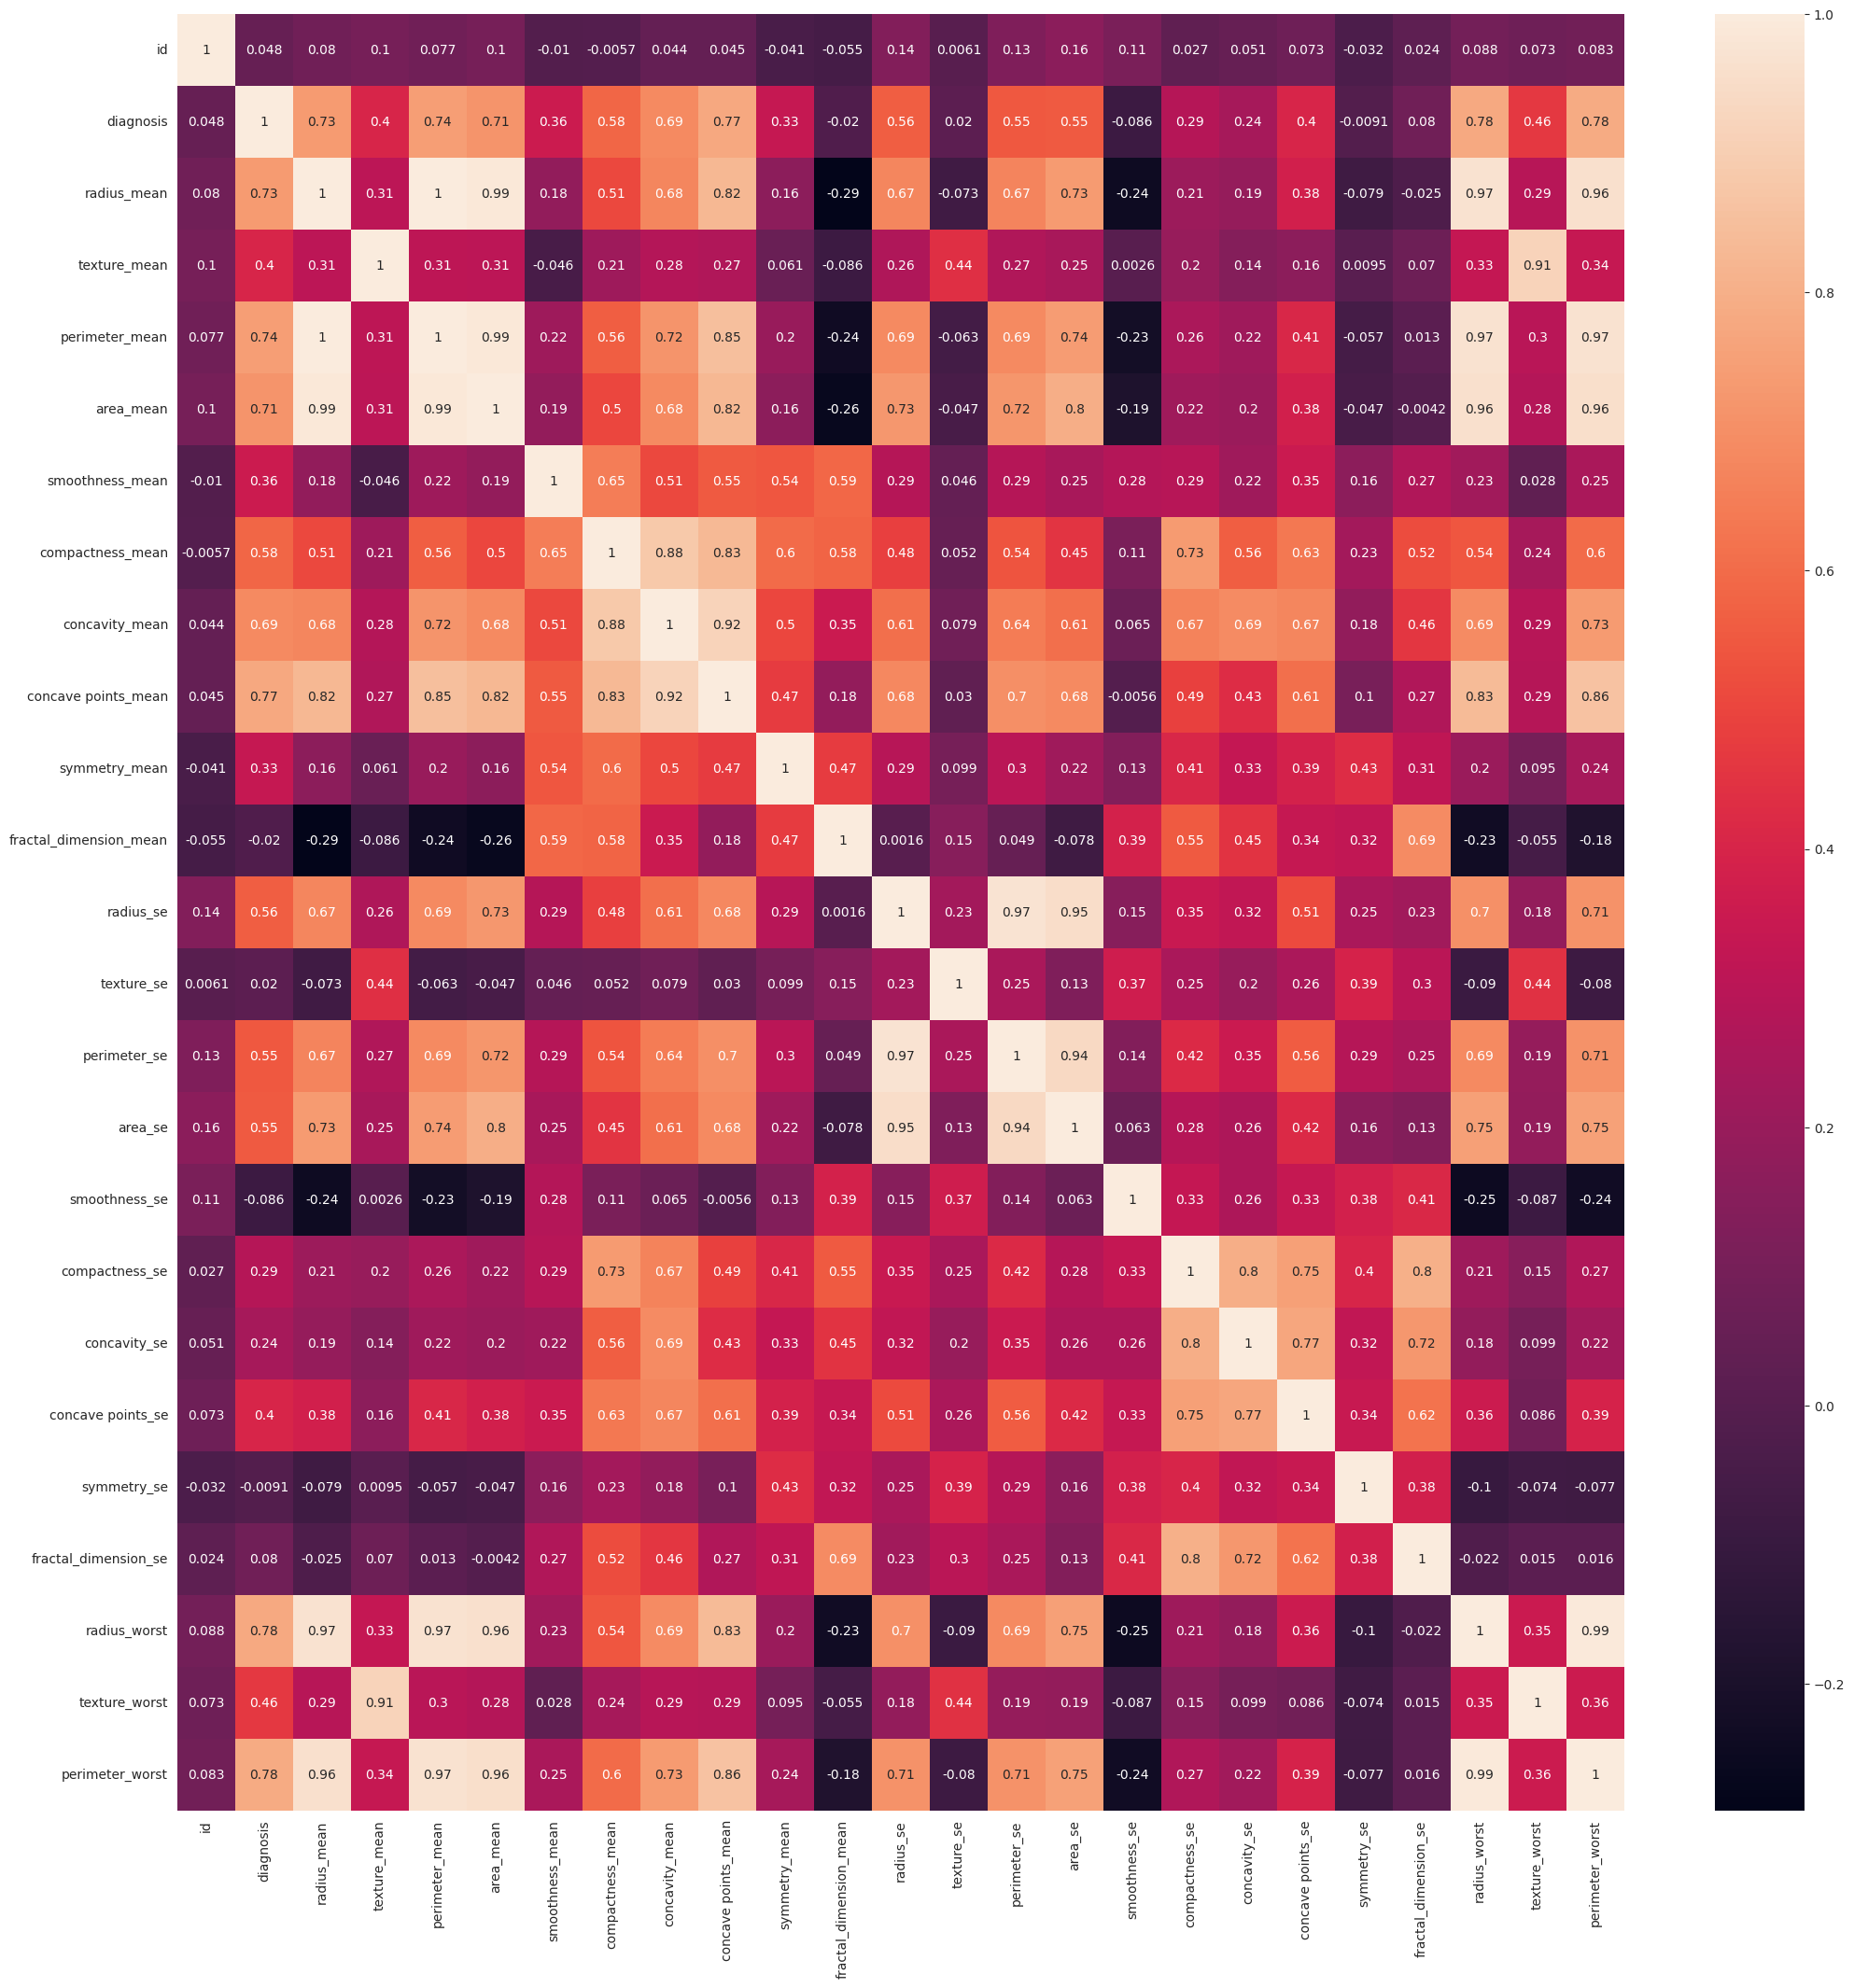

In [19]:
corr = dataset.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True)

In [20]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20


<Axes: >

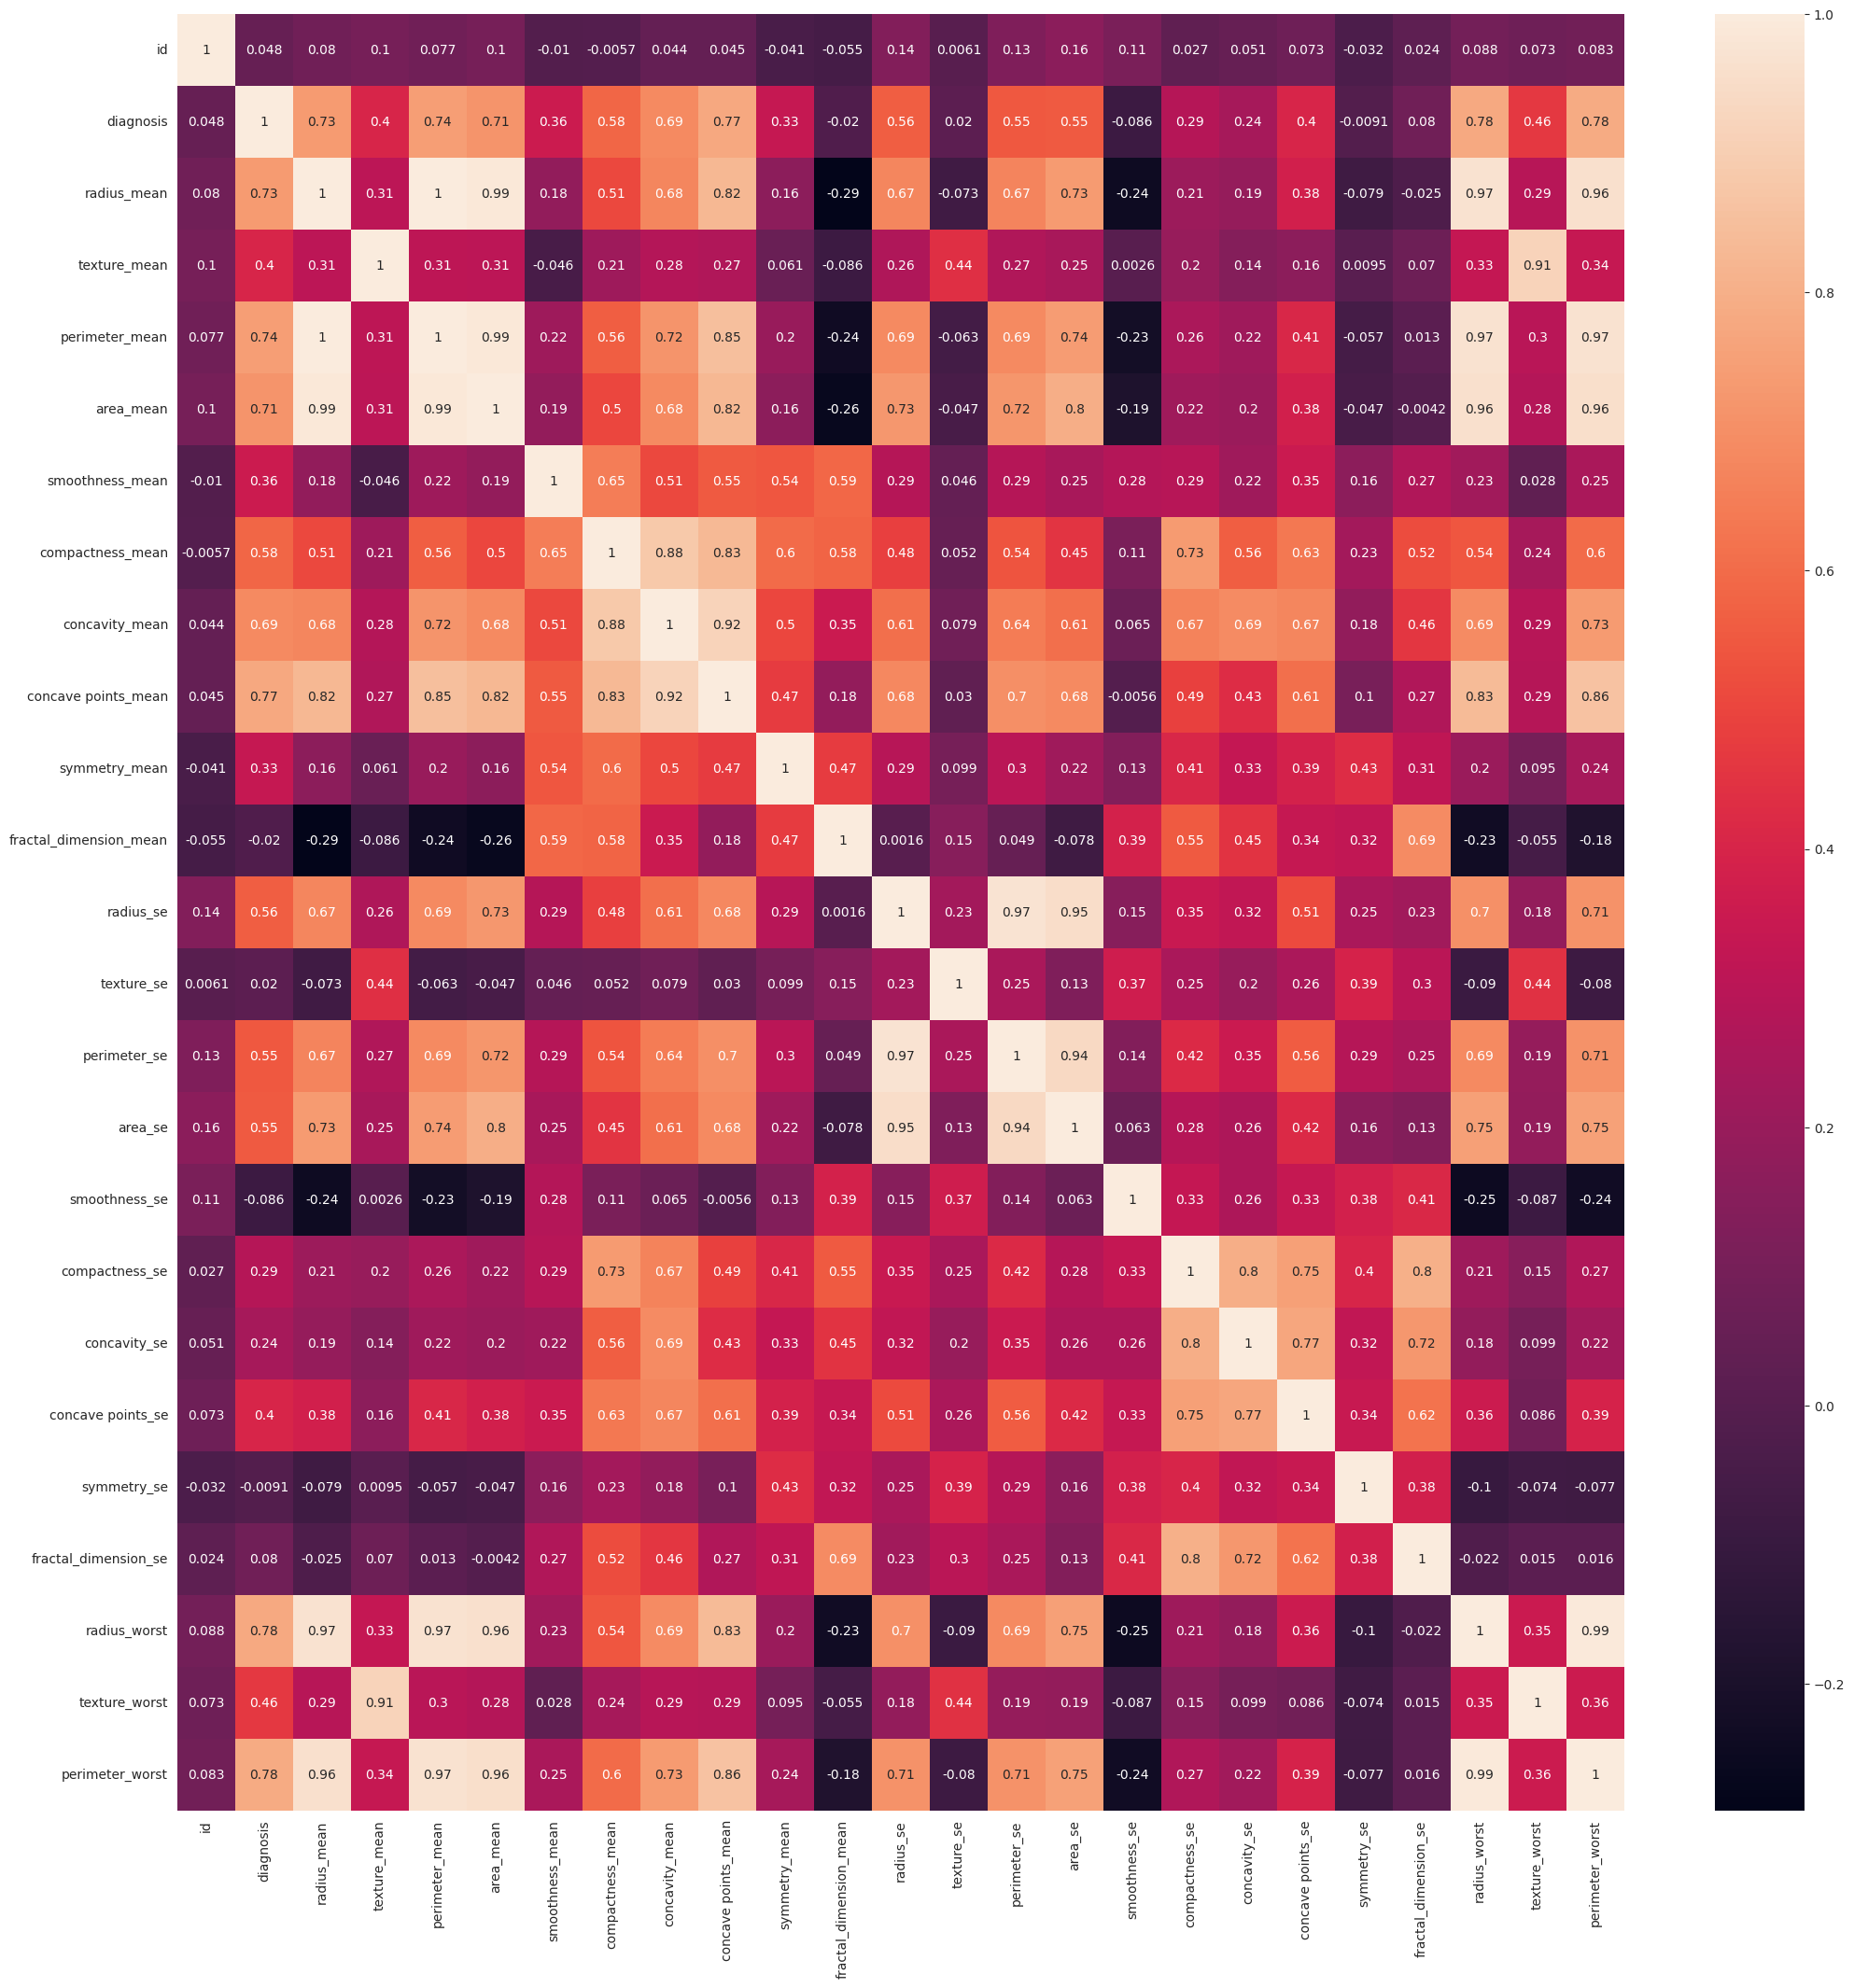

In [21]:
plt.figure(figsize = (25,25))
sns.heatmap(dataset.corr(), annot = True)

In [22]:
X = dataset.drop('diagnosis', axis = 1)
y = dataset['diagnosis']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (2855, 24) (2855,)
Test Set:  (714, 24) (714,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [27]:
from sklearn.svm import SVC
model_4 = SVC()
model_4.fit(X_train, y_train)

SVC()

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

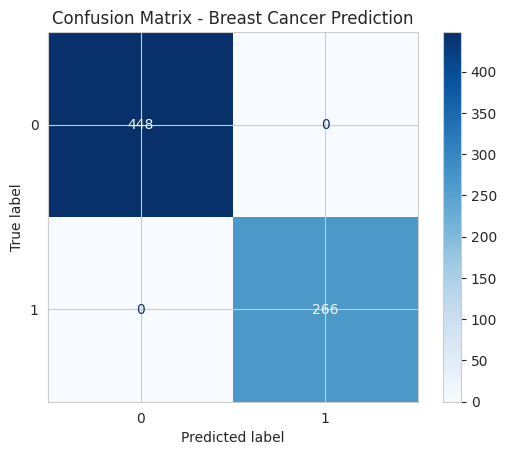

In [29]:
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Breast Cancer Prediction")
plt.show()

In [30]:
confusion_matrix(y_test, model.predict(X_test))

array([[448,   0],
       [  0, 266]])

In [31]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100,2)}")

Accuracy is 100.0


--- Training Logistic Regression ---


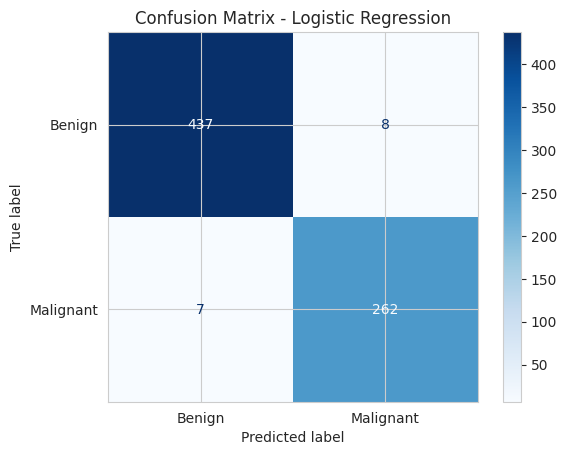

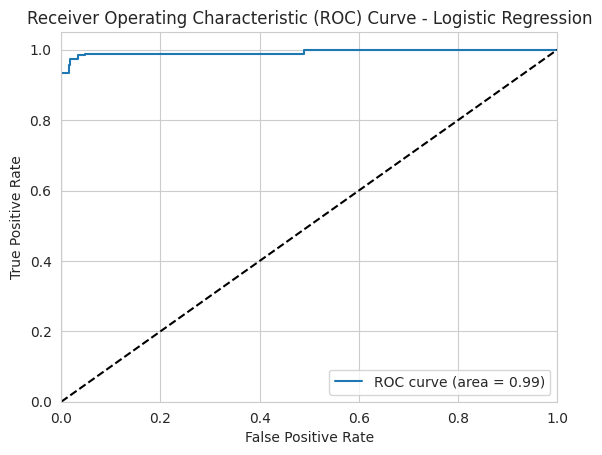

--- Training K-Nearest Neighbors (KNN) ---


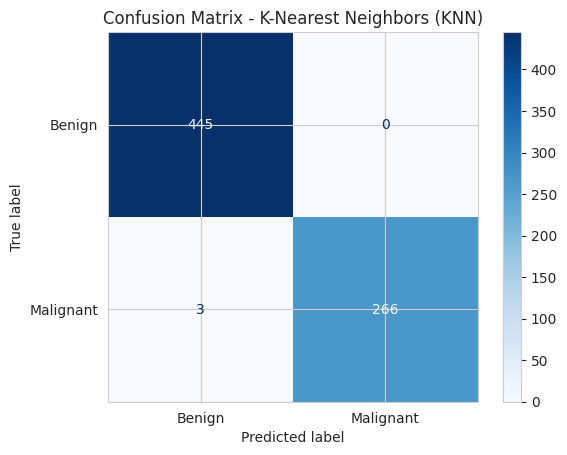

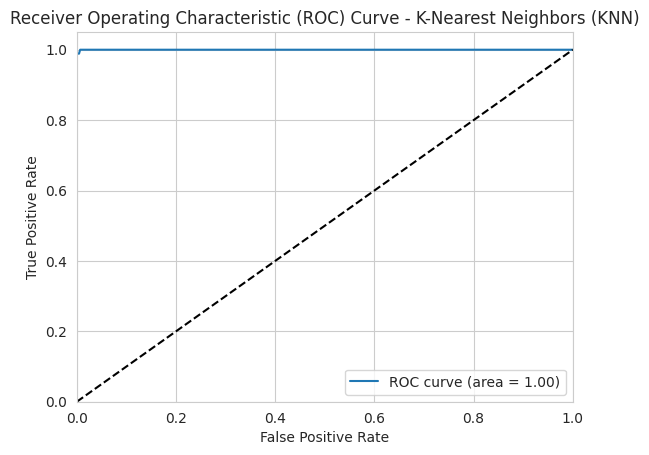

--- Training Stochastic Gradient Descent (SGD) ---


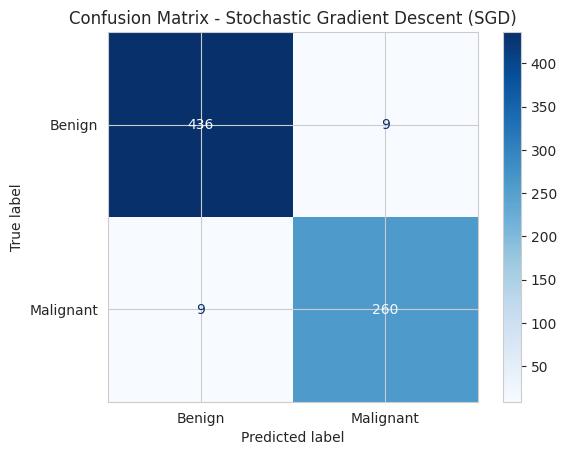

--- Training Support Vector Machine (SVM) ---


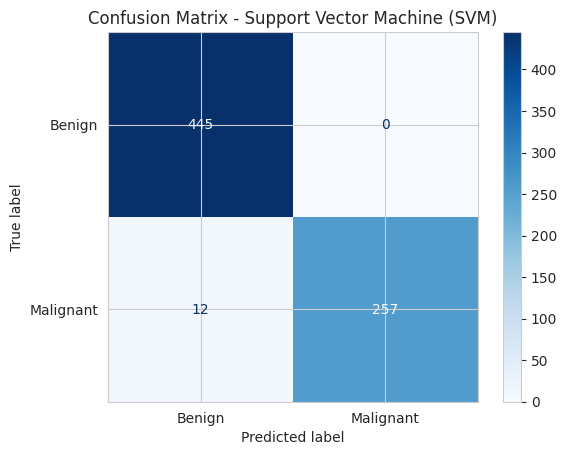

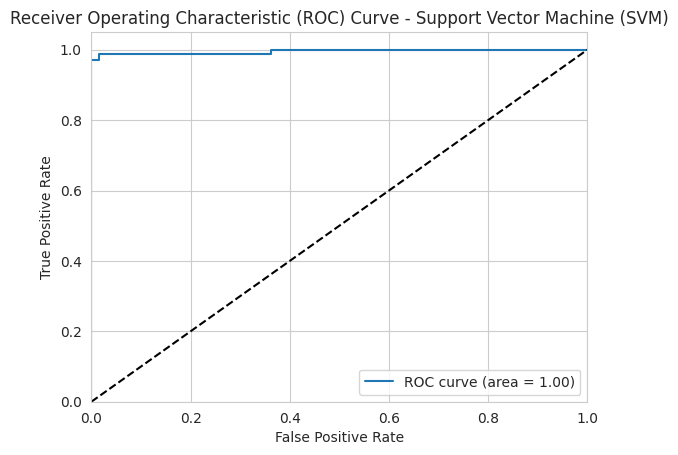

--- Training Naive Bayes ---


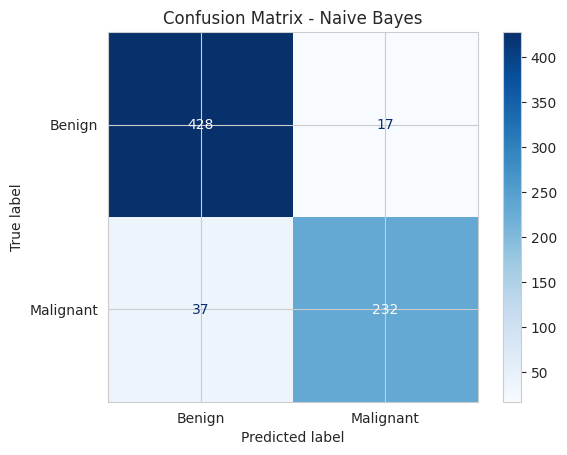

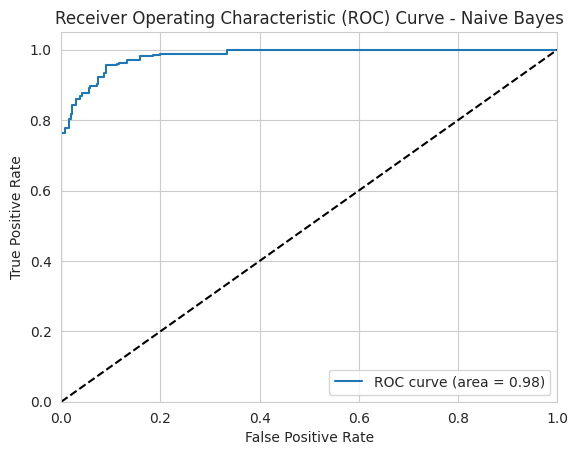

--- Training Decision Tree ---


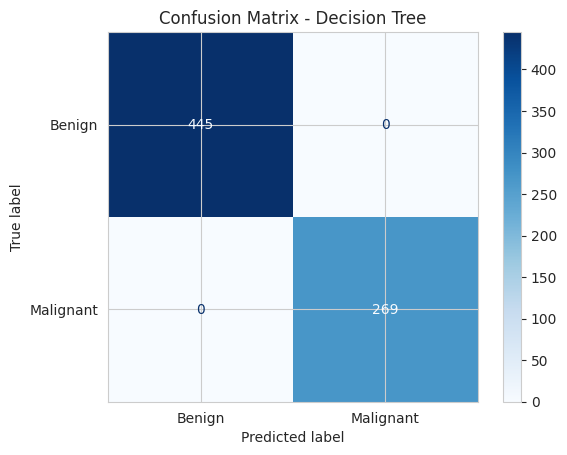

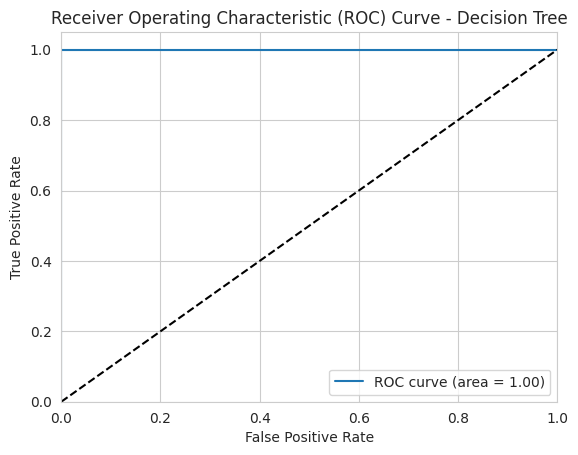

--- Training Random Forest ---


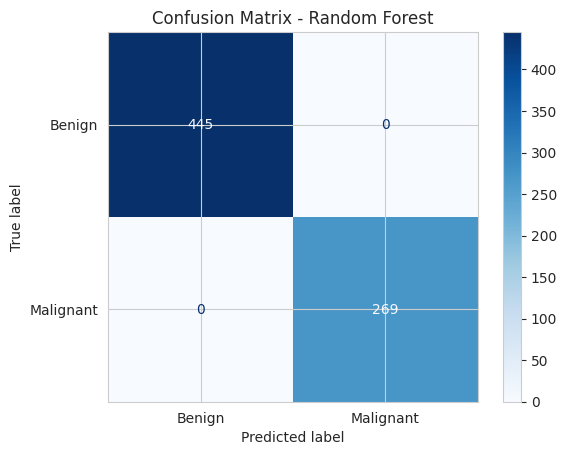

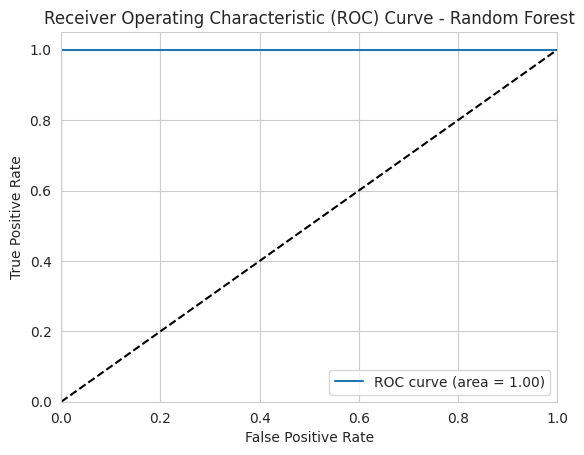

--- Training XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:40:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


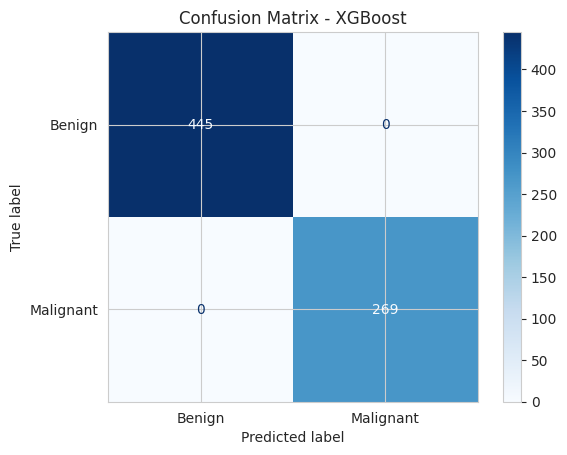

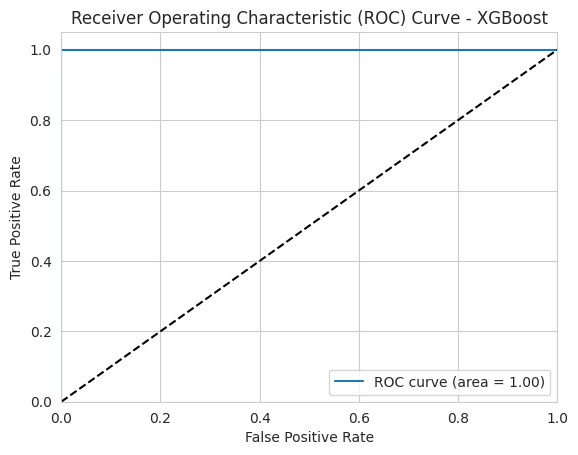



--- Model Performance Summary ---
                                   Accuracy Precision    Recall  F1 Score  \
Logistic Regression                0.978992   0.97037  0.973978  0.972171   
K-Nearest Neighbors (KNN)          0.995798       1.0  0.988848  0.994393   
Stochastic Gradient Descent (SGD)   0.97479  0.966543  0.966543  0.966543   
Support Vector Machine (SVM)       0.983193       1.0   0.95539  0.977186   
Naive Bayes                         0.92437  0.931727  0.862454  0.895753   
Decision Tree                           1.0       1.0       1.0       1.0   
Random Forest                           1.0       1.0       1.0       1.0   
XGBoost                                 1.0       1.0       1.0       1.0   

                                    ROC-AUC  
Logistic Regression                  0.9933  
K-Nearest Neighbors (KNN)          0.999937  
Stochastic Gradient Descent (SGD)       N/A  
Support Vector Machine (SVM)       0.995673  
Naive Bayes                        0.982

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Import the models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# --- 1. Load and Prepare the Data ---
# Load your dataset from a CSV file
# Make sure the target variable (what you want to predict) is in a column named 'diagnosis'
try:
    df = pd.read_csv('/content/cancer.csv')
except FileNotFoundError:
    print("Error: 'cancer.csv' not found. Please replace with the actual path to your data.")
    # As a placeholder, creating a dummy dataframe
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=208, n_features=60, n_informative=10, n_redundant=10, random_state=42)
    df = pd.DataFrame(X)
    df['diagnosis'] = y


# Separate features (X) and the target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# --- 2. Split the Data into Training and Testing Sets ---
# This divides the data so you can train the model on one part and test its performance on another.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state ensures the split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the target variable to numerical labels
y_train = y_train.map({'M': 1, 'B': 0})
y_test = y_test.map({'M': 1, 'B': 0})


# --- 3. Scale the Features (Optional but Recommended) ---
# Scaling standardizes the feature values (e.g., mean=0, std=1), which helps many models perform better.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 4. Initialize and Train the Models ---

# Create a dictionary to hold all the models you want to train
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(),
    "Support Vector Machine (SVM)": SVC(probability=True), # probability=True is needed for ROC-AUC
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each model, train it, and store its performance
results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")

    # Train the model on the (scaled) training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Explicitly convert to Series with appropriate dtype for metrics
    y_test_series = pd.Series(y_test, dtype='int64')
    y_pred_series = pd.Series(y_pred, dtype='int64')


    # Calculate performance metrics
    accuracy = accuracy_score(y_test_series, y_pred_series)
    precision = precision_score(y_test_series, y_pred_series)
    recall = recall_score(y_test_series, y_pred_series)
    f1 = f1_score(y_test_series, y_pred_series)
    roc_auc = roc_auc_score(y_test_series, y_pred_proba) if y_pred_proba is not None else 'N/A'


    # Store the results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    }

    # Display Confusion Matrix
    cm = confusion_matrix(y_test_series, y_pred_series)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Display ROC Curve
    if y_pred_proba is not None and roc_auc != 'N/A':
        fpr, tpr, _ = roc_curve(y_test_series, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()


# --- 5. Display the Results ---
print("\n\n--- Model Performance Summary ---")
results_df = pd.DataFrame(results).T
print(results_df)

In [40]:
import pickle # Import the pickle module
import numpy as np # Import numpy
from sklearn.linear_model import LogisticRegression # Import LogisticRegression to define the model

input_data = (20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8)


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Define and train a model to be saved and loaded
# Using a simple Logistic Regression model for demonstration
model = LogisticRegression()

# Train the model on your training data
# Make sure X_train and y_train are defined and contain your training data
try:
    model.fit(X_train, y_train)
except NameError:
    print("Error: X_train or y_train are not defined. Please run the data splitting cell first.")


# Save the model to a file
filename = 'Breastcancer.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from the saved file
loaded_model = pickle.load(open(filename, 'rb'))

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not breast cancer')
else:
  print('The person is breast cancer')

[1]
The person is breast cancer


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:

import pickle

In [42]:
filename = 'Breastcancer.sav'
pickle.dump(model, open(filename, 'wb'))

In [43]:
loaded_model = pickle.load(open('Breastcancer.sav', 'rb'))

In [44]:
for column in X.columns:
  print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst


In [45]:
cols_to_drop = ['symmetry_se','smoothness_se','texture_se','fractal_dimension_mean']
existing_cols_to_drop = [col for col in cols_to_drop if col in dataset.columns]
if existing_cols_to_drop:
    dataset.drop(existing_cols_to_drop, axis = 1, inplace = True)